 # **ANÁLISIS DE DATOS  24/09/2020 (HACIENDO LA DERIVADA)**
En este documento se detallan todos los pasos necesarios para realizar la derivada de los datos recogidos en formato *csv*. Es una primera aproximación al reconocimiento de las nubes.

## Importando librerías necesarias
A continuación se importan todas aquellas librerías que se necesitan para el análisis de los datos. Si alguna no existe, es necesario instalarla con el siguiente comando despues de haber importado la librería **sys**: 

**!{sys.executable} -m pip install nombredelalibrería**

Las librerías utilizadas son las siguientes:
* Pandas: Librería para manipulación y análisis de datos.
* Matplotlib: Librería para la generación de gráficos a partir de datos contenidos en listas o arrays.
* Scipy: Librería que se compone de herramientas y algoritmos matemático. En este caso se usarán las de procesamiento de señales.
* Tsmoothie: Librería para suavizar series de datos y detección de *outliers*.
* Numpy: Librería para crear vectores y matrices, junto con una gran colección de funciones matemáticas de alto nivel.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import lfilter
from tsmoothie.smoother import *
import numpy as np

## Importando datos
Para importar el archivo archivo *csv*, es necesario saber la ruta en la que se encuentra. Para hacerlo más sencillo, se puede copiar en la misma carpeta donde se ejecuta este documento.

In [5]:
data = pd.read_csv("24-09-2020.csv")

En la variable data se encuentra almacenado todo el archivo csv. Para echar un vistazo rápido a qué contine y cómo está organizado, se puede usar el comando print.

In [6]:
print(data)

             Time         t    G    T    V    C    F
0        10:57:04    873038  436  391  576  119  537
1        10:57:04    873048  437  392  578  121  549
2        10:57:04    873058  438  392  579  115  547
3        10:57:04    873068  436  394  578  106  542
4        10:57:04    873078  438  394  575  116  537
...           ...       ...  ...  ...  ...  ...  ...
1011160  13:46:03  11027175  821  477  699   31    0
1011161  13:46:03  11027185  821  478  699   28    0
1011162  13:46:03  11027195  820  478  698   29    0
1011163  13:46:03  11027205  820  478  700   30    0
1011164  13:46:03  11027215  821  478  698   30    0

[1011165 rows x 7 columns]


Como se puede ver, el archivo contiene 7 columnas y muchas filas con datos, que han sido recogidos en este caso cada 10 ms. Para realizar el análisis, la columna que interesa es la "G", que es la que pertenece a la irradiancia y la que mejor refleja el paso de nube.

### Importar las columnas que se necesiten
Se pueden también importar las columnas que se quieran con el siguiente comando:

In [22]:
data = pd.read_csv("24-09-2020.csv", usecols=["F", "G"])
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
           G    F
0        436  537
1        437  549
2        438  547
3        436  542
4        438  537
...      ...  ...
1011160  821    0
1011161  821    0
1011162  820    0
1011163  820    0
1011164  821    0

[1011165 rows x 2 columns]


O simplemente, una vez importado, se coge la columna que se quiera, que en nuestro caso será el eje y de la gráfica.

In [15]:
y = data["G"]
print(type(y))
print(y)

<class 'pandas.core.series.Series'>
0          436
1          437
2          438
3          436
4          438
          ... 
1011160    821
1011161    821
1011162    820
1011163    820
1011164    821
Name: G, Length: 1011165, dtype: int64


Se puede observar, que el tipo de dato no es el mismo. Las *series* son una estructura de datos de una columna de un *DataFrame*, aunque se pueden usar ambas para realizar una gráfica siempre y cuando se importe solo una columna, de lo contrario se graficaría todo lo importado.

Se puede ver en el siguiente ejemplo. Lo primero es graficar habiendo cogido el dato como *series*. 

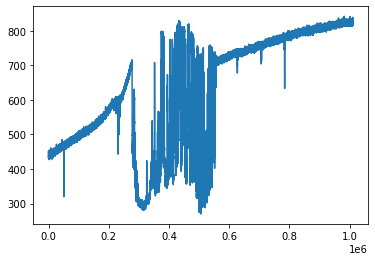

In [18]:
plt.plot(range(0, len(y)),y)

Ahora se importa directamente la columna de la irradiancia, "G" en este caso.

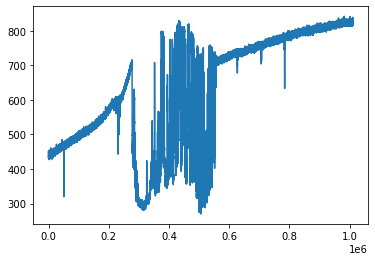

In [24]:
data = pd.read_csv("24-09-2020.csv", usecols=["G"])
plt.plot(range(0, len(data)),data)

El resultado es el mismo. Si se importan mas de una, se hacen las gráficas en conjunto.

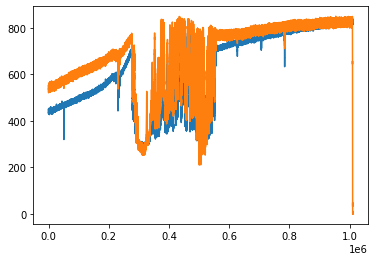

In [25]:
data = pd.read_csv("24-09-2020.csv", usecols=["F", "G"])
plt.plot(range(0, len(data)),data)

**En este caso, se utilizará la variable "y" que contiene la irradiancia (G) porque es lo que se va a analizar para el análisis de  nubes. Lo anterior era un ejemplo a modo explicativo**

## Filtrado previo de las señales
Esto se hace para eliminar el ruido y obtener valores más precisos y mejor visualizados. Para este propósito, se van a utilizar dos métodos diferentes para ver cuál da mejores resultados.

### Uso de filtro IRR
Este filtro pertenece a la librería *scipy*. Hay otros tipos de filtros que también podrían probarse para ver su funcionamiento.
El código que lo implementa es el siguiente:

In [27]:
n = 1000  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
y_filter = lfilter(b, a, y)